In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets  import make_moons

In [19]:
class NeuralNetworks:
    def __init__(self, input_size,hidden_size,output_size):
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.output_size=output_size

        self.W1=np.random.randn(hidden_size,input_size)*0.01
        self.b1=np.zeros((hidden_size,1))
        self.W2=np.random.randn(output_size,hidden_size)*0.01
        self.b2=np.zeros((output_size,1))

    def sigmoid(self,Z):
        return 1 / (1+np.exp(-Z))

    def forward_propogation(self,X):
        self.Z1=np.dot(self.W1,X)+self.b1
        self.A1=np.tanh(self.Z1)
        self.Z2=np.dot(self.W2,self.Z1)+self.b2
        self.A2=self.sigmoid(self.Z2)
        return self.A2
    
    def backword_propogation(self,X,Y):
        m=X.shape[1]

        dZ2=self.A2-Y
        dW2=(1/m)*np.dot(dZ2,self.A1.T)
        db2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)
        dZ1=np.dot(self.W2.T,dZ2)*(1-np.power(self.A1,2))
        dW1=(1/m)*np.dot(dZ1,X.T)
        db1=(1/m)*np.sum(dZ1,axis=1,keepdims=True)

        self.W2-=dW2*0.01
        self.b2-=db2*0.01
        self.W1-=dW1*0.01
        self.b1-=db1*0.01

    def cross_entropy_loss(self,Y,A):
        m = Y.shape[1]
        return -(1 / m) * np.sum(Y*np.log(A) + (1 - Y)*np.log(1 - A))
    
    def train(self,X,Y,num_epoch):
        for i in range(num_epoch+1):
            prediction=self.forward_propogation(X)

            loss=self.cross_entropy_loss(Y,prediction)

            self.backword_propogation(X,Y)

            if i%100==0:
                print(f'Epoch:{i} Loss:{loss}')


In [20]:
input_size=2
hidden_size=4
output_size=1
X=np.array([[0,0],[0,1],[1,0],[1,1]]).T
Y=np.array([[0,1,1,0]])
model=NeuralNetworks(input_size,hidden_size,output_size)
model.train(X,Y,num_epoch=1000)

Epoch:0 Loss:0.693147184884523
Epoch:100 Loss:0.6931471846040096
Epoch:200 Loss:0.6931471844338212
Epoch:300 Loss:0.693147184330481
Epoch:400 Loss:0.6931471842676452
Epoch:500 Loss:0.6931471842293527
Epoch:600 Loss:0.6931471842059317
Epoch:700 Loss:0.6931471841915222
Epoch:800 Loss:0.6931471841825732
Epoch:900 Loss:0.6931471841769329
Epoch:1000 Loss:0.693147184173298


In [21]:
X,Y=make_moons(n_samples=1000,noise=0.2,random_state=42)
X=X.T
Y=Y.reshape(1,-1)

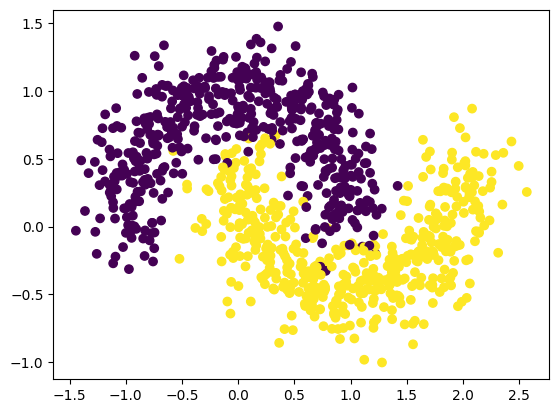

In [22]:
plt.scatter(X[0,:],X[1,:],c=Y.ravel())

In [23]:
input_size=2
hidden_size=4
output_size=1
model=NeuralNetworks(input_size,hidden_size,output_size)
model.train(X,Y,num_epoch=1000)

Epoch:0 Loss:0.6931758713855056
Epoch:100 Loss:0.6931116673263744
Epoch:200 Loss:0.6930331531368216
Epoch:300 Loss:0.6929084571520282
Epoch:400 Loss:0.6926871706153009
Epoch:500 Loss:0.6922803758157453
Epoch:600 Loss:0.6915263187888627
Epoch:700 Loss:0.6901308729848279
Epoch:800 Loss:0.6875687923709236
Epoch:900 Loss:0.6829374222188126
Epoch:1000 Loss:0.6747932929916164


# CNN

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [78]:
(train_X,train_Y),(test_X,test_Y)=mnist.load_data()
train_X=train_X.reshape((60000,28,28,1)).astype('float32')/255
test_X=test_X.reshape((10000,28,28,1)).astype('float32')/255
train_Y=to_categorical(train_Y)
teat_Y=to_categorical(test_Y)

In [79]:
def create_ConvNet(filter,kernel_size=(3,3),activation='relu',input_shape=None):
    if input_shape:
        return Conv2D(filters=filter,kernel_size=kernel_size,activation=activation,input_shape=input_shape)
    else:
        return Conv2D(filters=filter,kernel_size=kernel_size,activation=activation)

In [80]:
def create_maxpooling(pool_size=(2,2)):
    return MaxPooling2D(pool_size=pool_size)

In [81]:
def create_dense(units,activation='relu'):
    return Dense(units=units,activation=activation)

In [82]:
model1=Sequential()
model1.add(create_ConvNet(filter=32,input_shape=(28,28,1)))
model1.add(create_maxpooling())
model1.add(create_ConvNet(64))
model1.add(create_maxpooling())
model1.add(Flatten())
model1.add(create_dense(64))
model1.add(create_dense(10,activation='softmax'))

/usr/local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [83]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [84]:
model1.fit(train_X,train_Y,epochs=5,batch_size=128,validation_split=0.2)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.8165 - loss: 0.6101 - val_accuracy: 0.9764 - val_loss: 0.0827
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9745 - loss: 0.0810 - val_accuracy: 0.9798 - val_loss: 0.0660
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9845 - loss: 0.0510 - val_accuracy: 0.9826 - val_loss: 0.0627
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9882 - loss: 0.0382 - val_accuracy: 0.9827 - val_loss: 0.0554
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.9909 - loss: 0.0321 - val_accuracy: 0.9863 - val_loss: 0.0465


In [88]:
n=550
prediction=[test_X[n:n+5],model1.predict(test_X[n:n+5])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


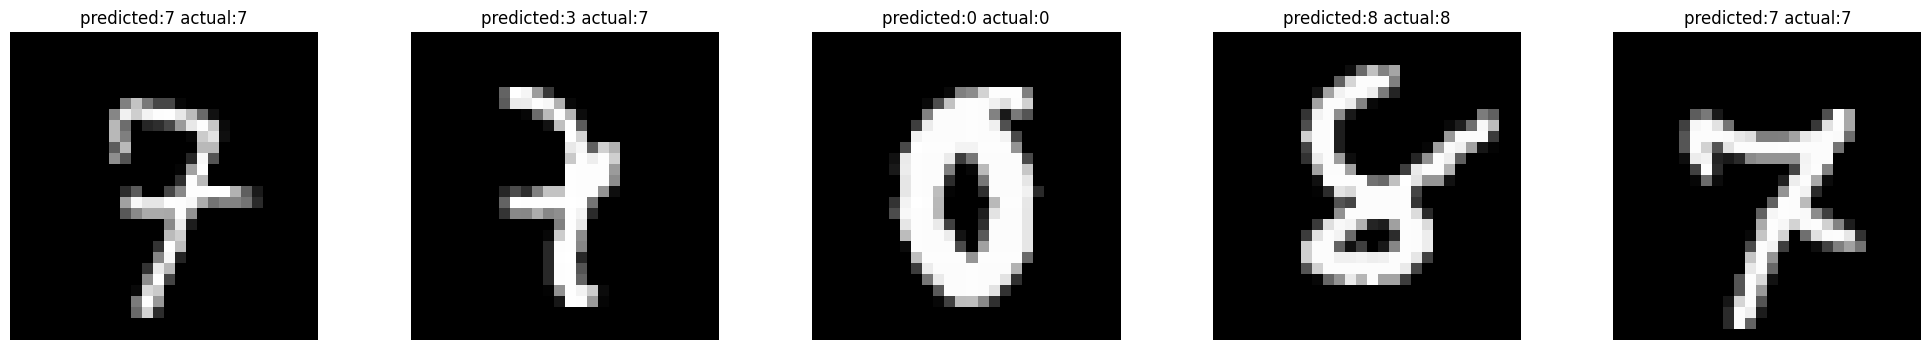

In [93]:
from matplotlib import pyplot as plt

plt.figure(figsize=(25,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    img_data=prediction[0][i].reshape(28,28)
    plt.imshow(img_data,cmap='gray')
    plt.title(f'predicted:{tf.argmax(prediction[1][i])} actual:{test_Y[n+i]}')
    plt.axis('off')
plt.show()

# SimpleRNN

In [69]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,SimpleRNN
from tensorflow.keras.preprocessing import sequence

In [70]:
(train_X,train_Y),(test_X,test_Y)=imdb.load_data(num_words=10000)

In [71]:
train_X=sequence.pad_sequences(train_X,maxlen=500)
test_X=sequence.pad_sequences(test_X,maxlen=500)

In [72]:
model2=Sequential()
model2.add(Embedding(10000,32))
model2.add(SimpleRNN(32))
model2.add(Dense(1,activation='sigmoid'))

In [73]:
model2.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [74]:
model2.fit(train_X,train_Y,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 57ms/step - accuracy: 0.6636 - loss: 0.6017 - val_accuracy: 0.8324 - val_loss: 0.4014
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.8474 - loss: 0.3701 - val_accuracy: 0.8342 - val_loss: 0.4392
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 57ms/step - accuracy: 0.8810 - loss: 0.3067 - val_accuracy: 0.8204 - val_loss: 0.4007
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.8994 - loss: 0.2677 - val_accuracy: 0.8338 - val_loss: 0.3770
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.9173 - loss: 0.2168 - val_accuracy: 0.8518 - val_loss: 0.3617
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.9282 - loss: 0.1852 - val_accuracy: 0.8192 - val_loss: 0.4139
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.9458 - loss: 0.1504 - val_accuracy: 0.7506 - val_loss: 0.5534
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.9461 - loss: 0.1472 - 

In [75]:
score,acc=model2.evaluate(test_X,test_Y,batch_size=32)
print(score)
print(acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8205 - loss: 0.5514
0.5443539023399353
0.8237599730491638


In [76]:
model2.predict(test_X)

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step


array([[0.21538647],
       [0.988693  ],
       [0.27103424],
       ...,
       [0.02393729],
       [0.07217432],
       [0.8806893 ]], dtype=float32)